In [235]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [236]:
#Cargar la base de datos
df=pd.read_csv("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")
path_to_data = ("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")

# Mostramos la base de datos
df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

In [237]:
df = df[df['year'] != 2101]
df = df[df['reclong'] != 354.473330]

In [238]:
# Convertir las columnas de coordenadas en un objeto Point
geometry = [Point(xy) for xy in zip(df.reclong, df.reclat)]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Guardar como GeoJSON
gdf.to_file("archivo.geojson", driver='GeoJSON')
gdf

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  \
0      1880.0  50.77500    6.08333       (50.775, 6.08333)   
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)   
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)   
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)   
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)   
...       ...       ...        ...                     ...   
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)   
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)   
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)   
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)   
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)   

                          geometry  
0         POINT (6.08333 50.77500)  
1        POINT (10.23333 56.18333)  
2      POINT (-113.00000 54.21667)  
3       POINT (-99.90000 16.88333)  
4      POINT (-64.95000 -33.16667)  
...                            ...  
45711    POINT (17.01850 29.03700)  
45712     POINT (8.96667 13.78333)  
45713    POINT (17.66667 49.25000)  
45714    POINT (41.50460 49.78917)  
45715  POINT (-115.68333 33.98333)  

[45714 rows x 11 columns]

# EDA

In [239]:
#Identificar datos nulos 
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        130
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

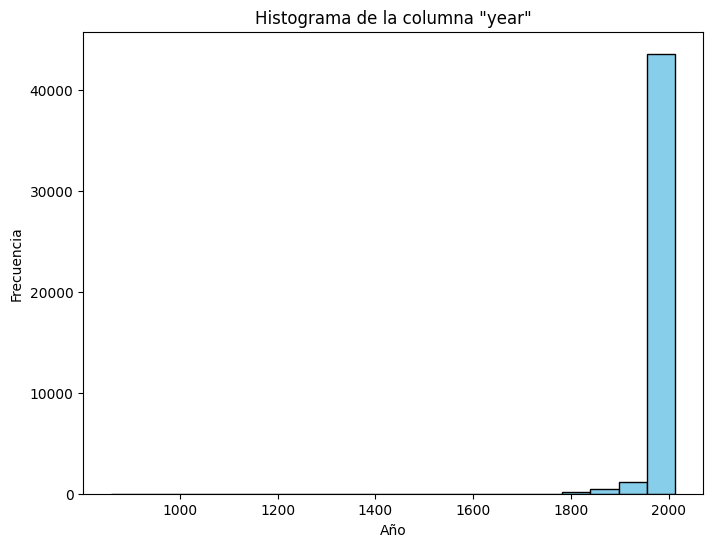

In [240]:
# Histograma para visualizar la distribución de la columna 'year'
plt.figure(figsize=(8, 6))
plt.hist(df['year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna "year"')
plt.show()


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'mass (g)'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'reclat'}>],
       [<Axes: title={'center': 'reclong'}>, <Axes: >]], dtype=object)

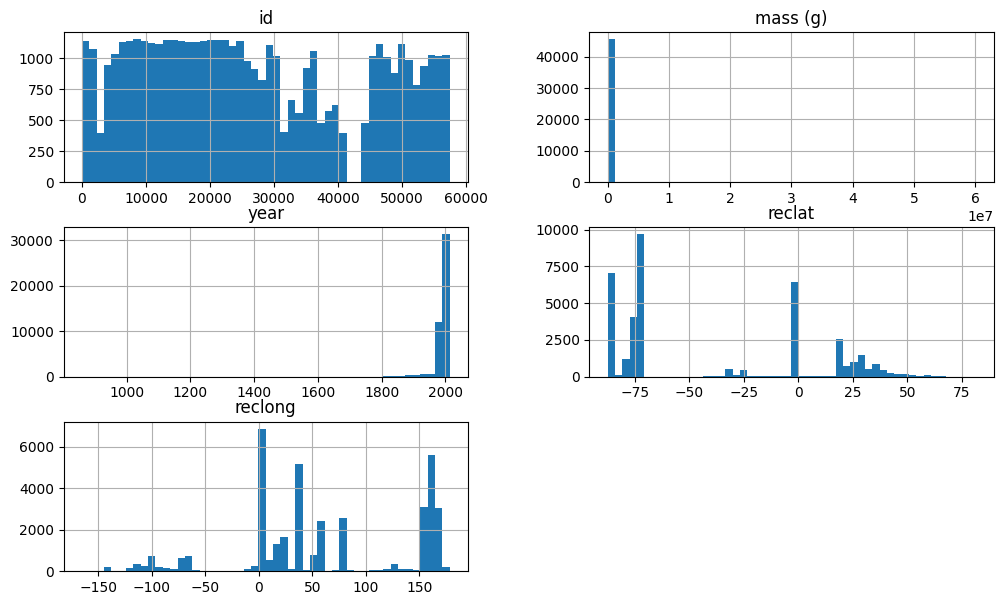

In [241]:
#Histograma de las columnas
df.hist(bins=50, figsize=(12,7))

<Axes: >

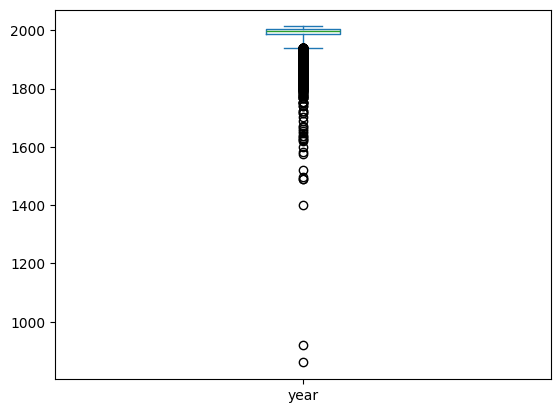

In [242]:
# Diagrama de cajas y bigotes del años
df['year'].plot(kind='box',whis=3)

<Axes: >

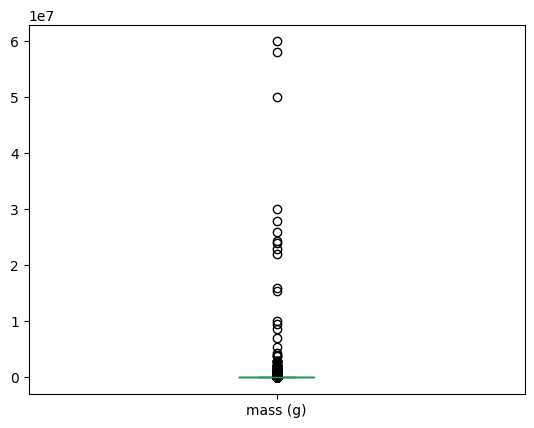

In [243]:
# Diagrama de cajas y bigotes de mass
df['mass (g)'].plot(kind='box')

In [244]:
if gdf.crs is None:
    # Define el CRS deseado (por ejemplo, EPSG:4326 para WGS84)
    crs = "EPSG:4326"
    # Establece el CRS para el GeoDataFrame
    gdf1 = gdf.set_crs(crs)

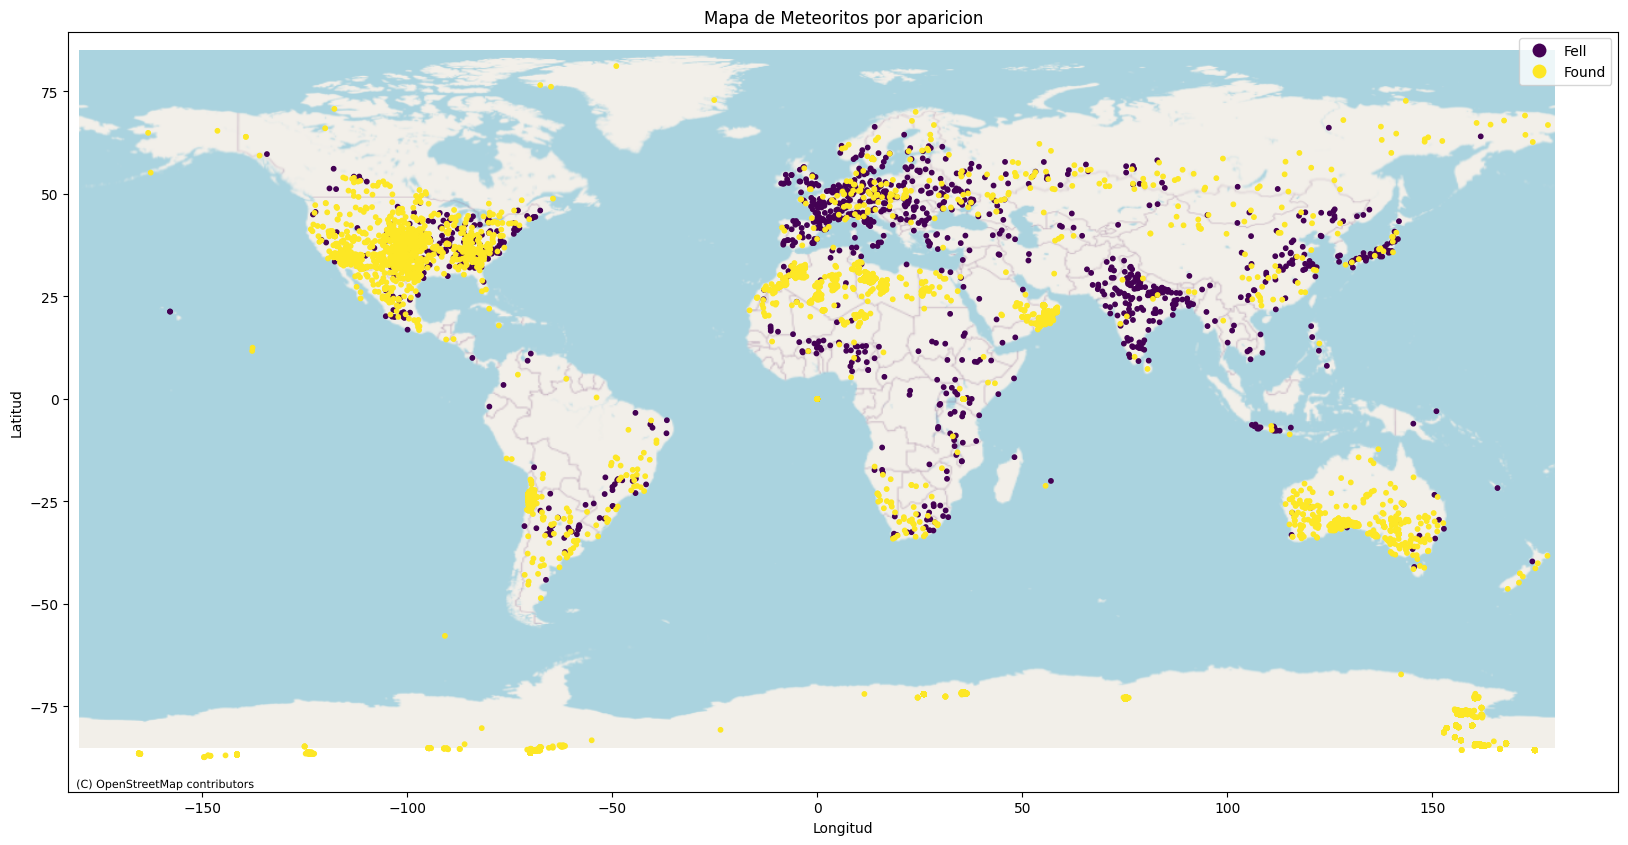

In [245]:
ax = gdf.plot(column='fall', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por aparicion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()
 


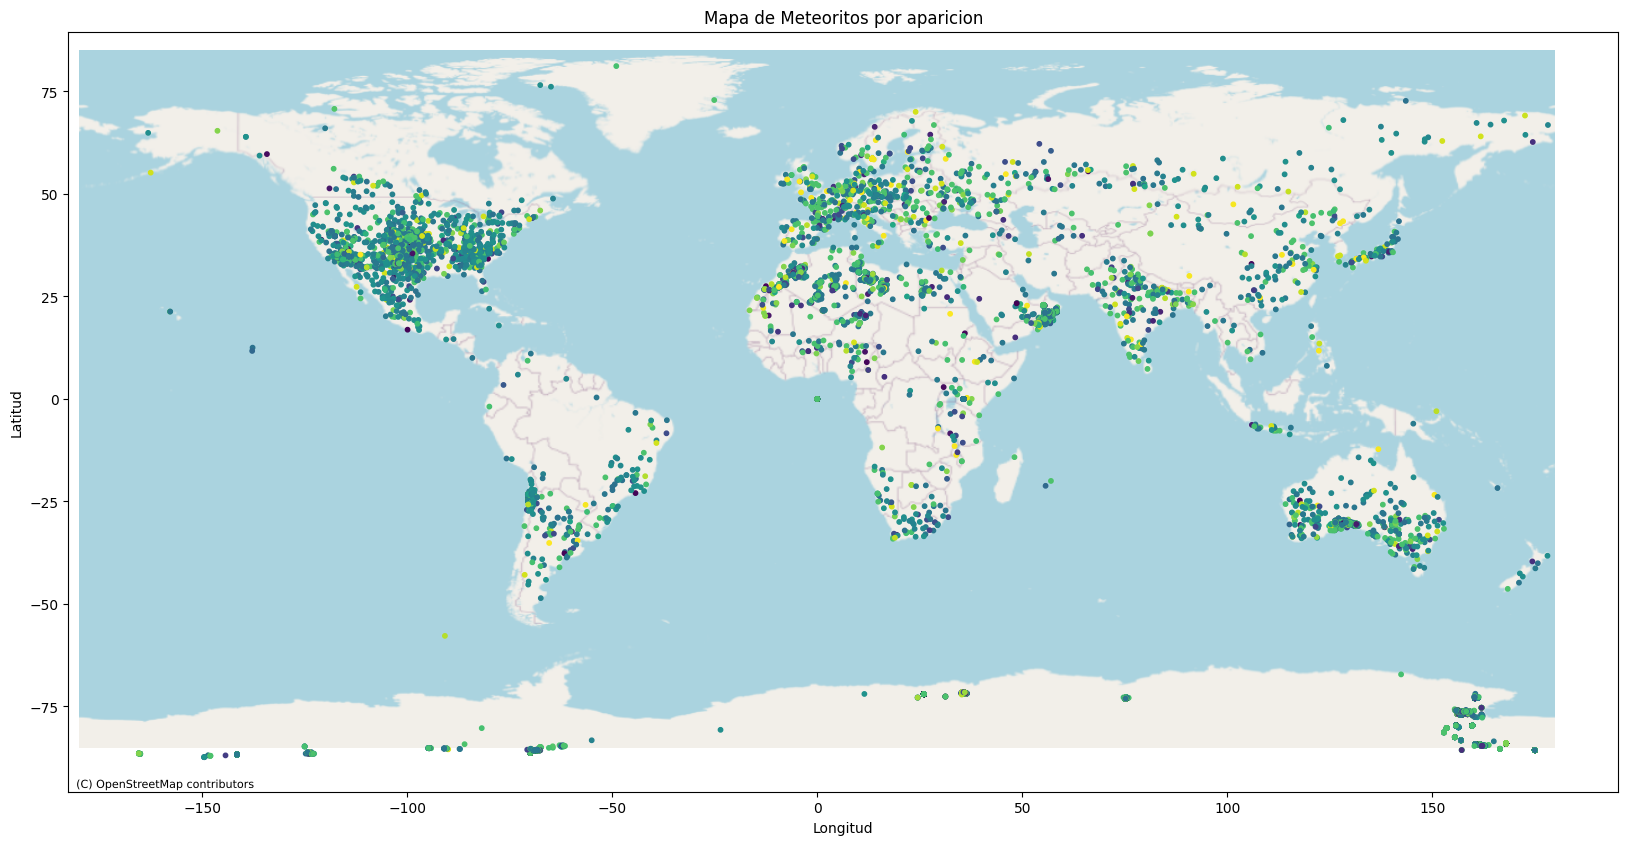

In [246]:
ax = gdf.plot(column='recclass', cmap='viridis', markersize=10, legend=False)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por aparicion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

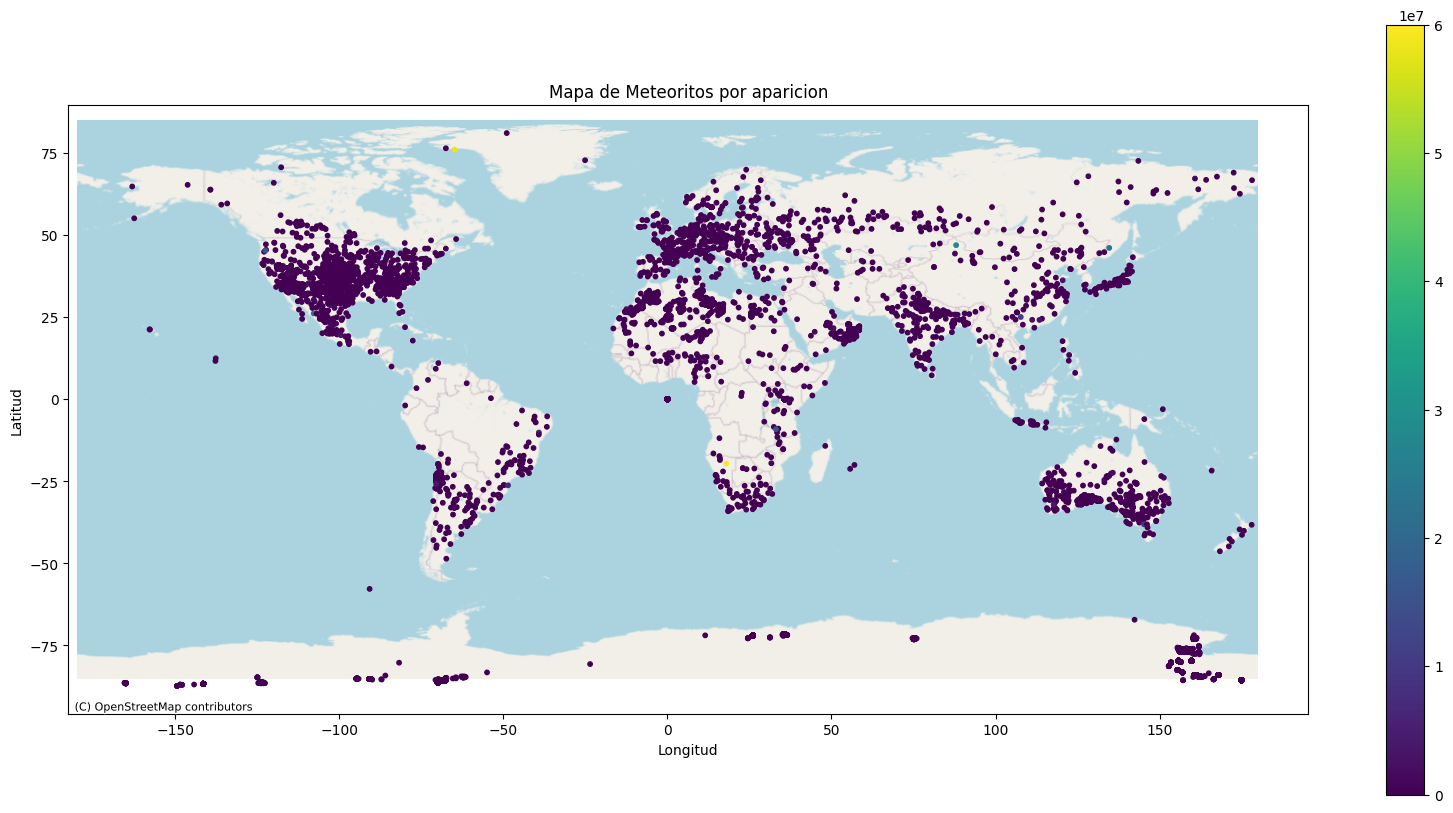

In [247]:
ax = gdf.plot(column='mass (g)', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por aparicion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()


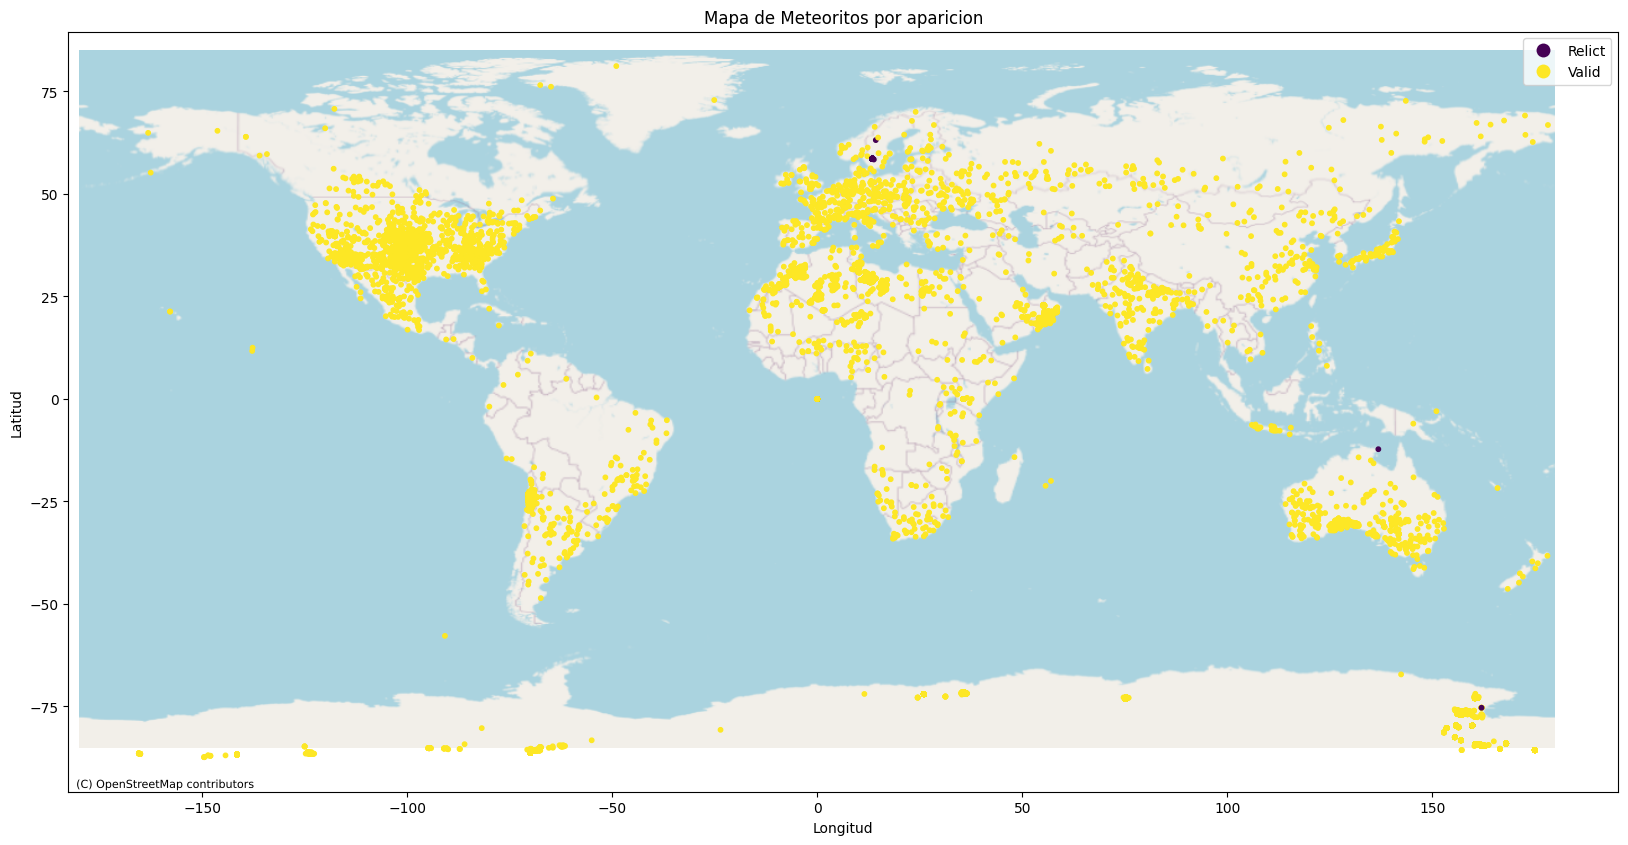

In [248]:
ax = gdf.plot(column='nametype', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por aparicion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()


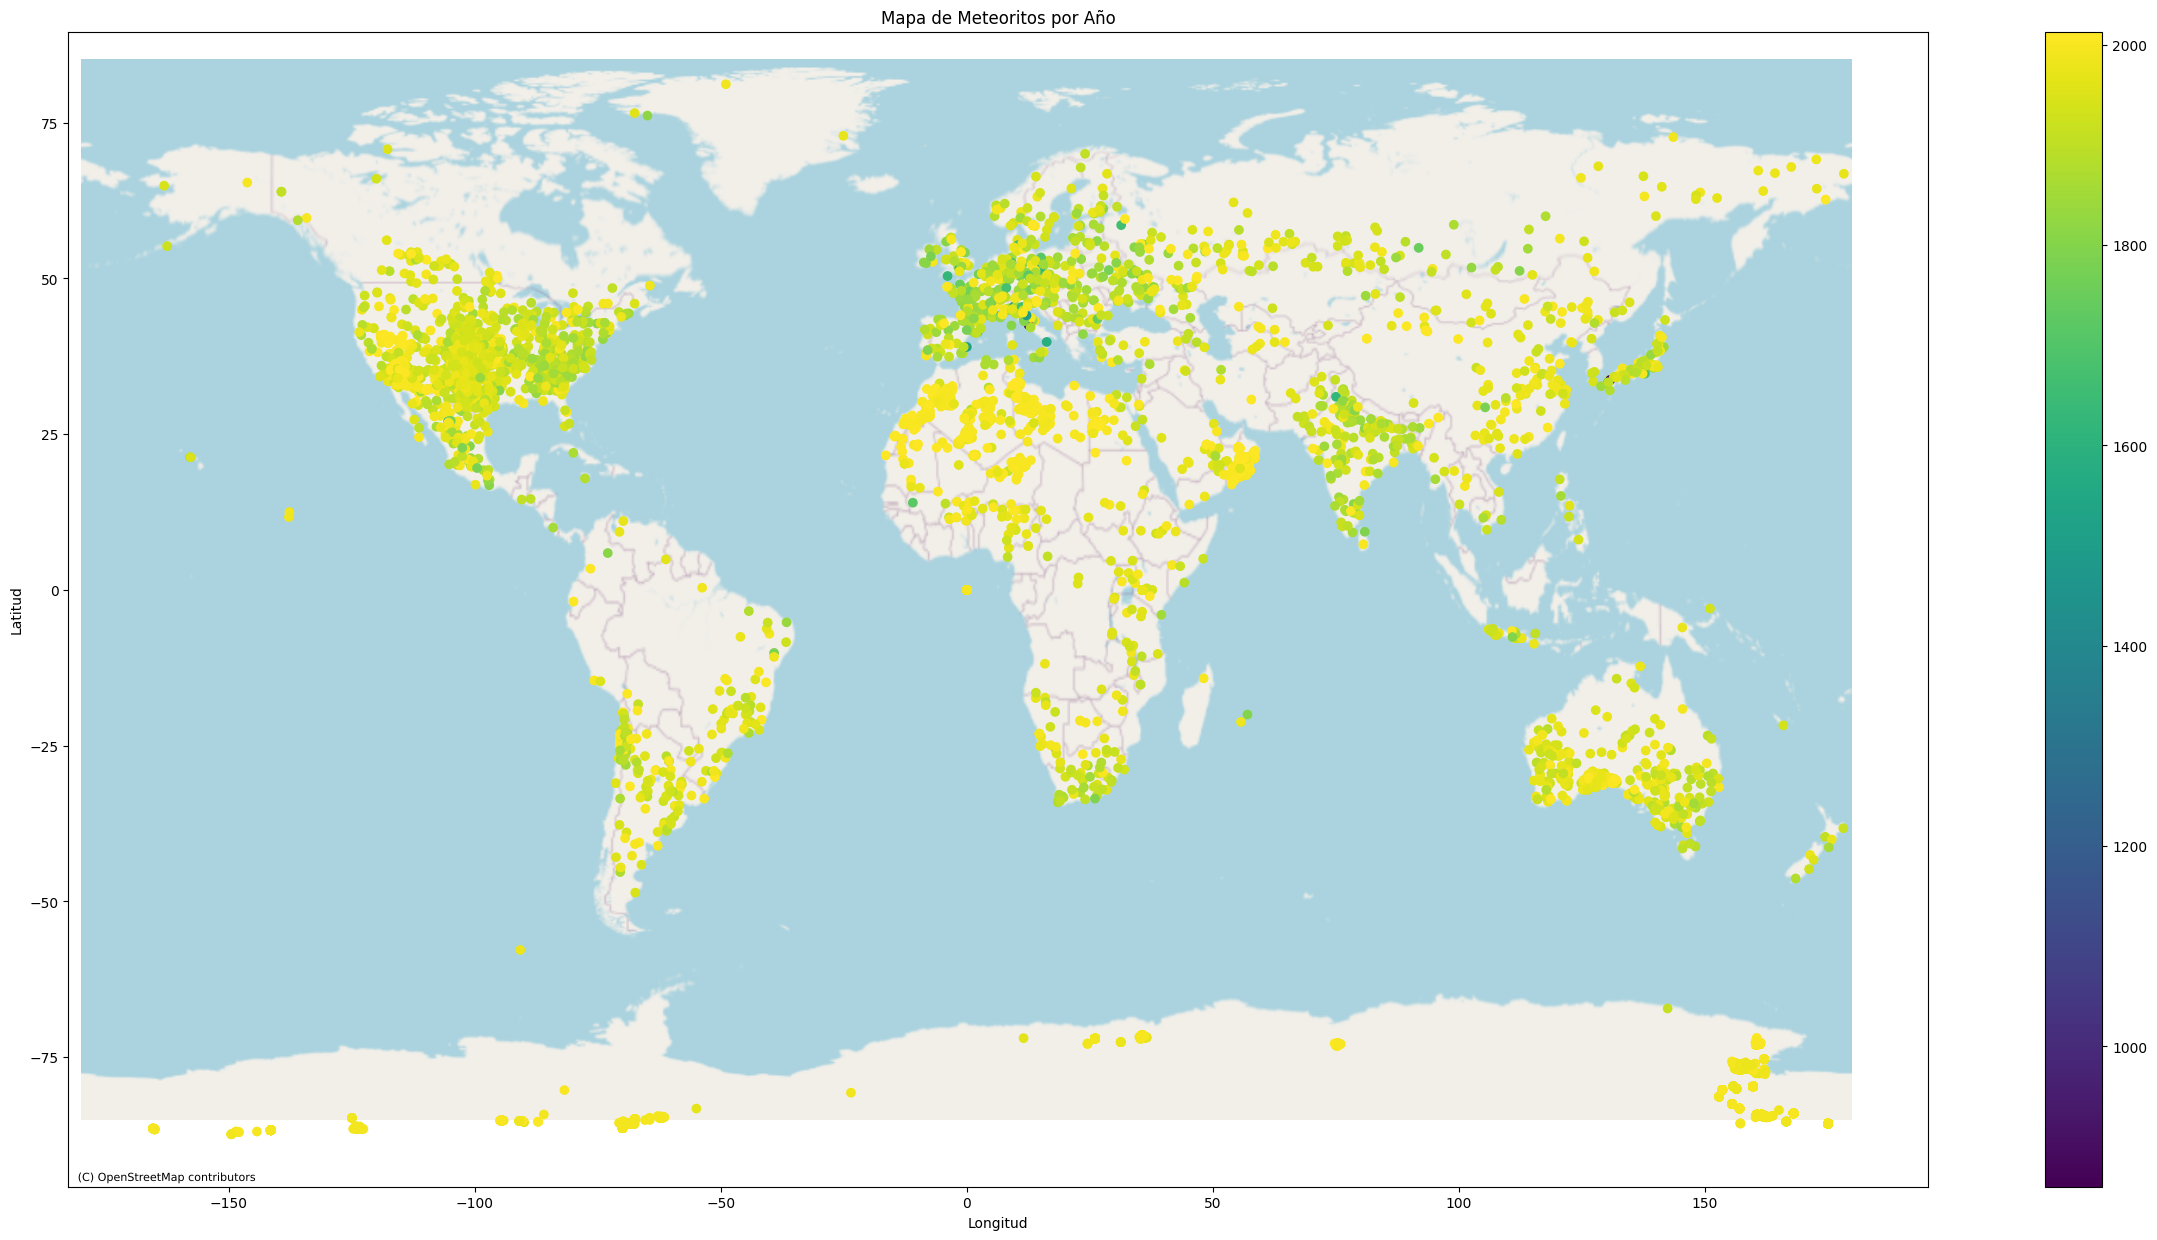

In [249]:

# Plot de los puntos de localización
ax = gdf1.plot(column='year', cmap='viridis', legend=True)
# Ajustar el tamaño de la figura
fig = ax.get_figure()
fig.set_size_inches(30, 15)

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar la relación de aspecto
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [250]:
gdf1[gdf1['mass (g)']==gdf1['mass (g)'].max()]

name     id nametype   recclass    mass (g)   fall    year    reclat  \
16392  Hoba  11890    Valid  Iron, IVB  60000000.0  Found  1920.0 -19.58333   

        reclong            GeoLocation                    geometry  
16392  17.91667  (-19.58333, 17.91667)  POINT (17.91667 -19.58333)

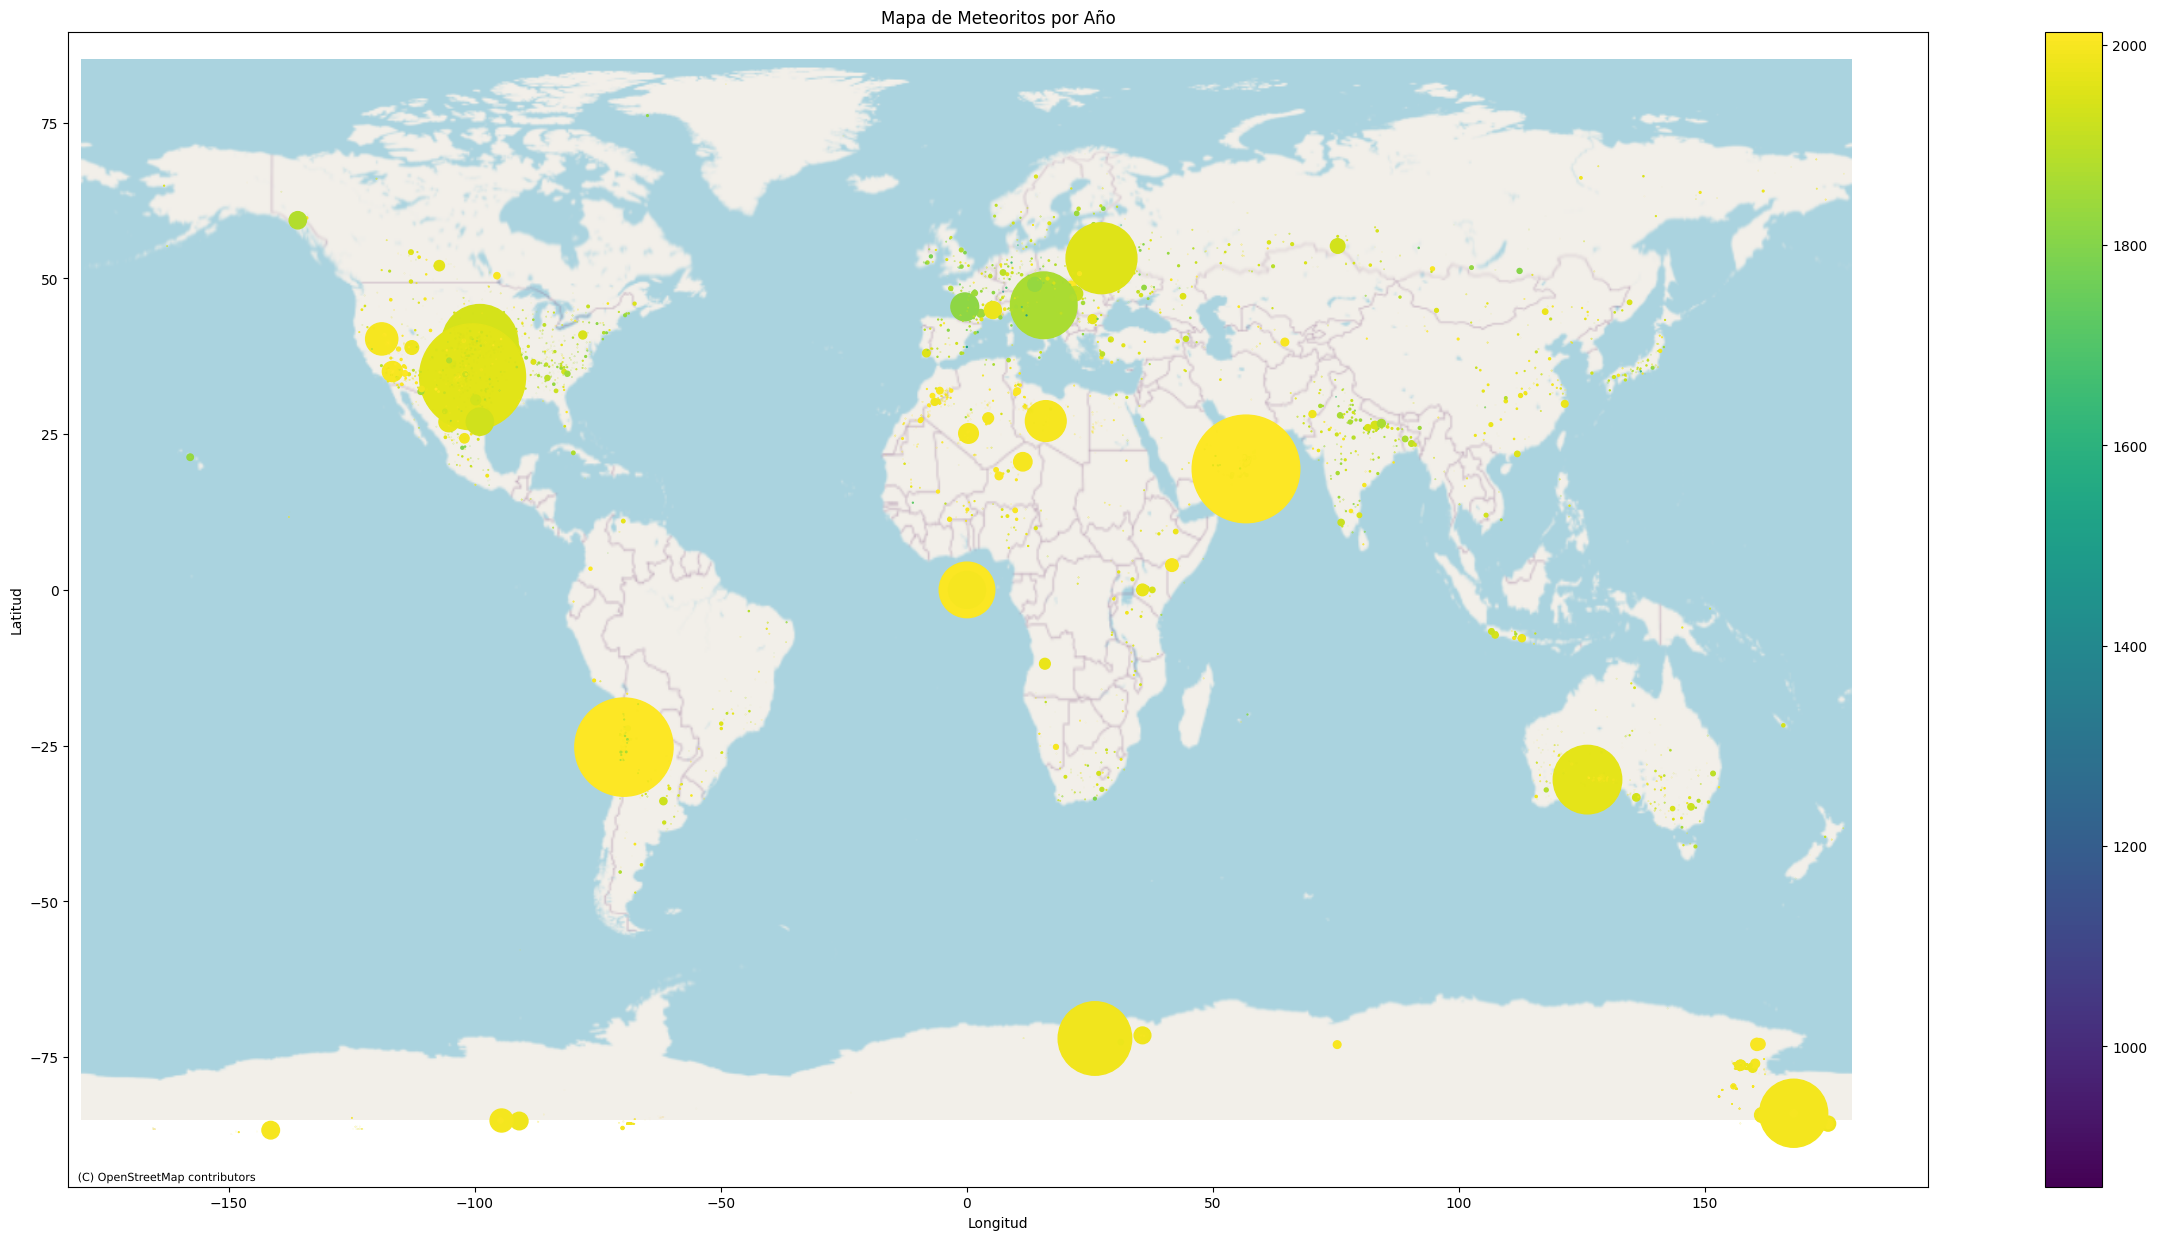

In [251]:
# Escala los valores de la columna 'mass' para usarlos como tamaño de los marcadores
marker_sizes = gdf1['mass (g)'] / 10000  # Puedes ajustar el factor divisor para cambiar el tamaño de los marcadores

# Plot de los puntos de localización con tamaños de marcadores escalados
ax = gdf1.plot(column='year', cmap='viridis', legend=True, markersize=marker_sizes)

# Ajustar el tamaño de la figura
fig = ax.get_figure()
fig.set_size_inches(30, 15)

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar la relación de aspecto
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()

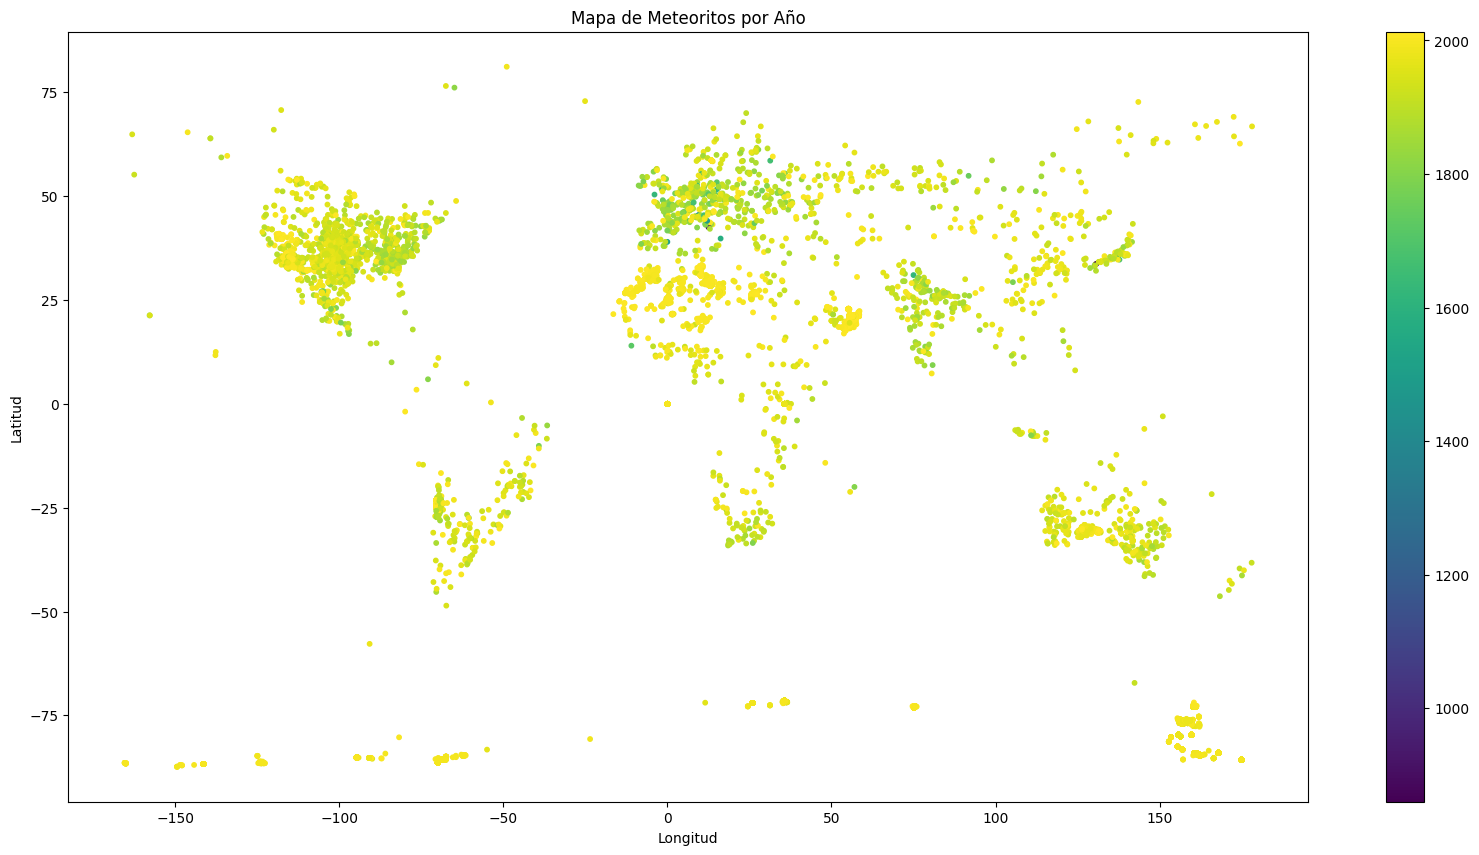

In [252]:


ax = gdf.plot(column='year', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

In [253]:
df.describe()

id      mass (g)          year        reclat       reclong
count  45714.000000  4.558400e+04  45423.000000  38399.000000  38399.000000
mean   26888.944109  1.327837e+04   1991.826123    -39.124567     61.068268
std    16860.435252  5.749952e+05     25.048004     46.378901     80.634896
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.250000  7.200000e+00   1987.000000    -76.714255      0.000000
50%    24260.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40655.750000  2.026225e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2013.000000     81.166670    178.200000

In [254]:
df['year'].max()

2013.0

In [255]:
IQR=df['mass (g)'].quantile(0.75)-df['mass (g)'].quantile(0.25)
IQR

195.4225

In [256]:
lower =df['mass (g)'].quantile(0.25) - 1.5*IQR
upper =df['mass (g)'].quantile(0.75) + 1.5*IQR

print(lower, upper)

-285.93375000000003 495.75625


In [257]:
df[(df['mass (g)']<lower) | (df['mass (g)']>upper)]

name     id nametype           recclass   mass (g)   fall  \
1          Aarhus      2    Valid                 H6      720.0   Fell   
2            Abee      6    Valid                EH4   107000.0   Fell   
3        Acapulco     10    Valid        Acapulcoite     1914.0   Fell   
4         Achiras    370    Valid                 L6      780.0   Fell   
5        Adhi Kot    379    Valid                EH4     4239.0   Fell   
...           ...    ...      ...                ...        ...    ...   
45707    Zhaoping  54609    Valid  Iron, IAB complex  2000000.0  Found   
45708    Zhigansk  30405    Valid        Iron, IIIAB   900000.0  Found   
45709  Zhongxiang  30406    Valid               Iron   100000.0  Found   
45710  Zillah 001  31355    Valid                 L6     1475.0  Found   
45714   Zubkovsky  31357    Valid                 L6     2167.0  Found   

         year    reclat    reclong            GeoLocation  
1      1951.0  56.18333   10.23333   (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000     (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000      (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000    (-33.16667, -64.95)  
5      1919.0  32.10000   71.80000           (32.1, 71.8)  
...       ...       ...        ...                    ...  
45707  1983.0  24.23333  111.18333  (24.23333, 111.18333)  
45708  1966.0  68.00000  128.30000          (68.0, 128.3)  
45709  1981.0  31.20000  112.50000          (31.2, 112.5)  
45710  1990.0  29.03700   17.01850      (29.037, 17.0185)  
45714  2003.0  49.78917   41.50460    (49.78917, 41.5046)  

[7086 rows x 10 columns]

In [258]:
IQR2=df['year'].quantile(0.75)-df['year'].quantile(0.25)
IQR2

16.0

In [259]:
lower =df['year'].quantile(0.25) - 1.5*IQR
upper =df['year'].quantile(0.75) + 1.5*IQR

print(lower, upper)

1693.86625 2296.13375


In [260]:
df[(df['year']<lower) | (df['year']>upper)]

name     id nametype      recclass    mass (g)   fall  \
174       Castrovillari   5295    Valid    Stone-uncl     15000.0   Fell   
278             Elbogen   7823    Valid     Iron, IID    107000.0   Fell   
283           Ensisheim  10039    Valid           LL6    127000.0   Fell   
312               Fünen  10838    Valid    Stone-uncl         NaN   Fell   
369             Hatford  11855    Valid    Stone-uncl     29000.0   Fell   
410           Jalandhar  12069    Valid          Iron      1967.0   Fell   
627            Minamino  16692    Valid             L      1040.0   Fell   
657         Mount Vaisi  16805    Valid    Stone-uncl     17000.0   Fell   
679               Narni  16914    Valid    Stone-uncl         NaN   Fell   
704              Nogata  16988    Valid            L6       472.0   Fell   
710           Novy-Ergi  17934    Valid    Stone-uncl         NaN   Fell   
730        Oliva-Gandia  18012    Valid    Stone-uncl         NaN   Fell   
737             Ortenau  18033    Valid    Stone-uncl      4500.0   Fell   
856    Rivolta de Bassi  22614    Valid    Stone-uncl       103.3   Fell   
869               Sagan  22796    Valid    Stone-uncl         NaN   Fell   
887            Sasagase  23187    Valid             H       695.0   Fell   
957           Stolzenau  23726    Valid    Stone-uncl         NaN   Fell   
960        Stretchleigh  23732    Valid    Stone-uncl     10400.0   Fell   
1040               Vago  24143    Valid            H6        40.0   Fell   
1043          Valdinoce  24146    Valid    Stone-uncl         NaN   Fell   
5365    Campo del Cielo   5247    Valid  Iron, IAB-MG  50000000.0  Found   
26174            Morito  16745    Valid   Iron, IIIAB  10100000.0  Found   

         year    reclat    reclong             GeoLocation  
174    1583.0  39.80000   16.20000            (39.8, 16.2)  
278    1399.0  50.18333   12.73333    (50.18333, 12.73333)  
283    1491.0  47.86667    7.35000        (47.86667, 7.35)  
312    1654.0  55.33333   10.33333    (55.33333, 10.33333)  
369    1628.0  51.65000   -1.51667       (51.65, -1.51667)  
410    1621.0  31.00000   75.00000            (31.0, 75.0)  
627    1632.0  35.07833  136.93333   (35.07833, 136.93333)  
657    1637.0  44.08333    6.86667     (44.08333, 6.86667)  
679     920.0  42.51667   12.51667    (42.51667, 12.51667)  
704     860.0  33.72500  130.75000        (33.725, 130.75)  
710    1662.0  58.55000   31.33333       (58.55, 31.33333)  
730    1519.0  39.00000   -0.03333        (39.0, -0.03333)  
737    1671.0  48.50000    8.00000             (48.5, 8.0)  
856    1490.0  45.48333    9.51667     (45.48333, 9.51667)  
869    1636.0  51.53333   14.88333    (51.53333, 14.88333)  
887    1688.0  34.71667  137.78333   (34.71667, 137.78333)  
957    1647.0  52.53333    9.05000        (52.53333, 9.05)  
960    1623.0  50.38333   -3.95000       (50.38333, -3.95)  
1040   1668.0  45.41667   11.13333    (45.41667, 11.13333)  
1043   1495.0  44.06667   12.10000        (44.06667, 12.1)  
5365   1575.0 -27.46667  -60.58333  (-27.46667, -60.58333)  
26174  1600.0  27.05000 -105.43333     (27.05, -105.43333)

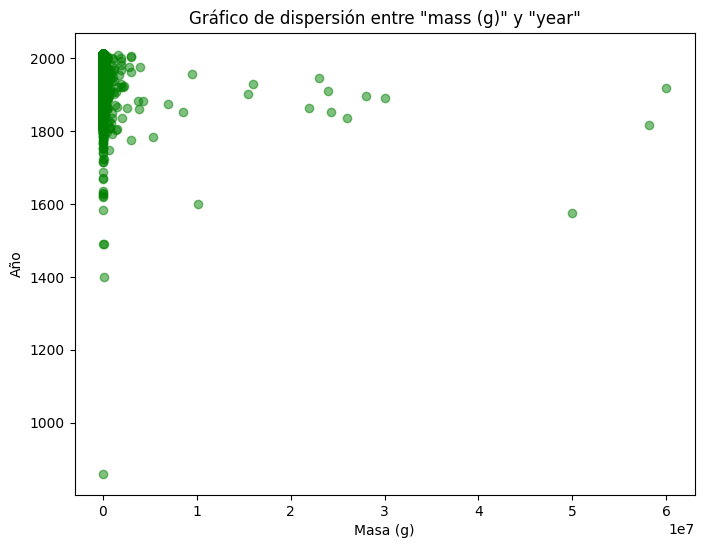

In [261]:
# Gráfico de dispersión para visualizar la relación entre 'mass (g)' y 'year'
plt.figure(figsize=(8, 6))
plt.scatter(df['mass (g)'], df['year'], alpha=0.5, color='green')
plt.xlabel('Masa (g)')
plt.ylabel('Año')
plt.title('Gráfico de dispersión entre "mass (g)" y "year"')
plt.show()


In [262]:
df['recclass'].unique

<bound method Series.unique of 0                          L5
1                          H6
2                         EH4
3                 Acapulcoite
4                          L6
                 ...         
45711                 Eucrite
45712    Pallasite, ungrouped
45713                      H4
45714                      L6
45715                    L3.7
Name: recclass, Length: 45714, dtype: object>

In [263]:
df[(df['year'].isnull()==True)]

name     id nametype      recclass  mass (g)   fall  \
37     Northwest Africa 5815  50693    Valid            L5     256.8  Found   
1937              Cacilandia   5191    Valid            H6       NaN  Found   
3431         Apache Junction  54566    Valid   Iron, IIIAB   25000.0  Found   
3462         Asarco Mexicana   2344    Valid   Iron, IIIAB       NaN  Found   
5008                     Aus   4902    Valid             L      30.2  Found   
...                      ...    ...      ...           ...       ...    ...   
38207               Valencia  24147    Valid            H5   33500.0  Found   
38231           Villa Regina  53827    Valid   Iron, IIIAB    5030.0  Found   
38308        Wietrzno-Bobrka  24259    Valid          Iron     376.0  Found   
38335              Wiltshire  56143    Valid            H5   92750.0  Found   
45700               Zaragoza  48916    Valid  Iron, IVA-an  162000.0  Found   

       year    reclat    reclong          GeoLocation  
37      NaN   0.00000    0.00000           (0.0, 0.0)  
1937    NaN       NaN        NaN                  NaN  
3431    NaN  33.45000 -111.51667  (33.45, -111.51667)  
3462    NaN       NaN        NaN                  NaN  
5008    NaN -26.66667   16.25000   (-26.66667, 16.25)  
...     ...       ...        ...                  ...  
38207   NaN  39.00000   -0.03333     (39.0, -0.03333)  
38231   NaN -39.10000  -67.06667   (-39.1, -67.06667)  
38308   NaN  49.41667   21.70000     (49.41667, 21.7)  
38335   NaN  51.14967   -1.81000    (51.14967, -1.81)  
45700   NaN  41.65000   -0.86667    (41.65, -0.86667)  

[291 rows x 10 columns]

In [264]:
df['year'].mode()[0]

2003.0

In [265]:
df=pd.read_csv("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")

path_to_data = ("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")


# Mostramos la base de datos
df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

# aqui 


In [266]:

mean_mass = df['mass (g)'].mean()
mode_year = df['year'].mode()[0]



In [267]:
df['mass (g)'] = df['mass (g)'].fillna(mean_mass)
df['year'] = df['year'].fillna(mode_year)
df

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[45716 rows x 10 columns]

In [268]:
# Convertir los valores de la columna 'masa' de gramos a kilogramos
df['mass (kg)'] = df['mass (g)'] / 1000

# Eliminar la columna 'masa (g)' si ya no la necesitas
df.drop(columns=['mass (g)'], inplace=True)
df

name     id nametype              recclass   fall    year  \
0          Aachen      1    Valid                    L5   Fell  1880.0   
1          Aarhus      2    Valid                    H6   Fell  1951.0   
2            Abee      6    Valid                   EH4   Fell  1952.0   
3        Acapulco     10    Valid           Acapulcoite   Fell  1976.0   
4         Achiras    370    Valid                    L6   Fell  1902.0   
...           ...    ...      ...                   ...    ...     ...   
45711  Zillah 002  31356    Valid               Eucrite  Found  1990.0   
45712      Zinder  30409    Valid  Pallasite, ungrouped  Found  1999.0   
45713        Zlin  30410    Valid                    H4  Found  1939.0   
45714   Zubkovsky  31357    Valid                    L6  Found  2003.0   
45715  Zulu Queen  30414    Valid                  L3.7  Found  1976.0   

         reclat    reclong             GeoLocation  mass (kg)  
0      50.77500    6.08333       (50.775, 6.08333)     0.0210  
1      56.18333   10.23333    (56.18333, 10.23333)     0.7200  
2      54.21667 -113.00000      (54.21667, -113.0)   107.0000  
3      16.88333  -99.90000       (16.88333, -99.9)     1.9140  
4     -33.16667  -64.95000     (-33.16667, -64.95)     0.7800  
...         ...        ...                     ...        ...  
45711  29.03700   17.01850       (29.037, 17.0185)     0.1720  
45712  13.78333    8.96667     (13.78333, 8.96667)     0.0460  
45713  49.25000   17.66667       (49.25, 17.66667)     0.0033  
45714  49.78917   41.50460     (49.78917, 41.5046)     2.1670  
45715  33.98333 -115.68333  (33.98333, -115.68333)     0.2000  

[45716 rows x 10 columns]

In [269]:
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'df' es tu DataFrame de pandas y 'columna' es el nombre de la columna que deseas transformar

# Paso 1: Inicializa el LabelEncoder
le = LabelEncoder()

# Paso 2: Ajusta el LabelEncoder a los datos de la columna
le.fit(df['recclass'])

# Paso 3: Transforma los valores de la columna en el DataFrame
df['recclass'] = le.transform(df['recclass'])

In [270]:
# Paso 2: Ajusta el LabelEncoder a los datos de la columna
le.fit(df['nametype'])

# Paso 3: Transforma los valores de la columna en el DataFrame
df['nametype'] = le.transform(df['nametype'])

In [271]:
# Paso 2: Ajusta el LabelEncoder a los datos de la columna
le.fit(df['fall'])

# Paso 3: Transforma los valores de la columna en el DataFrame
df['fall'] = le.transform(df['fall'])

In [272]:

# Identificar filas con valores faltantes en la columna específica
filas_con_valores_faltantes = df[df['GeoLocation'].isnull()]

# Crear un nuevo conjunto de datos con esas filas
dataset_valores_faltantes = filas_con_valores_faltantes.copy()

# Eliminar las filas con valores faltantes del dataset original
df = df.dropna(subset=['GeoLocation'])

# Guardar el nuevo dataset en otro archivo CSV si es necesario
dataset_valores_faltantes.to_csv('valores_faltantes.csv', index=False)  # Cambia 'valores_faltantes.csv' por el nombre que desees

# Ahora 'df' contiene el dataset original sin las filas con valores faltantes en la columna específica
# Y 'dataset_valores_faltantes' contiene las filas con valores faltantes en la columna específica

In [273]:
df1=pd.read_csv('/home/josue/Progra/notebooks/valores_faltantes.csv')
df1

name     id  nametype  recclass  fall    year  reclat  \
0               Bulls Run   5163         1       238     0  1964.0     NaN   
1                 Clohars   5383         1       319     0  1822.0     NaN   
2                Jalanash  12068         1       462     0  1990.0     NaN   
3                Jemlapur  12079         1       333     0  1901.0     NaN   
4     Cumulus Hills 04075  32531         1       431     1  2003.0     NaN   
...                   ...    ...       ...       ...   ...     ...     ...   
7310        Yamato 981086  37708         1       175     1  1998.0     NaN   
7311        Yamato 981090  37712         1       175     1  1998.0     NaN   
7312        Yamato 984028  40648         1       413     1  1998.0     NaN   
7313          Yambo no. 2  30346         1       276     1  1975.0     NaN   
7314     Zacatecas (1969)  30382         1       228     1  1969.0     NaN   

      reclong  GeoLocation  mass (kg)  
0         NaN          NaN   2.250000  
1         NaN          NaN   0.048600  
2         NaN          NaN   0.700000  
3         NaN          NaN   0.450000  
4         NaN          NaN   0.009600  
...       ...          ...        ...  
7310      NaN          NaN   0.005227  
7311      NaN          NaN   0.008682  
7312      NaN          NaN   0.012342  
7313      NaN          NaN   0.003200  
7314      NaN          NaN   6.660000  

[7315 rows x 10 columns]

In [274]:
df1.isnull().sum()

name              0
id                0
nametype          0
recclass          0
fall              0
year              0
reclat         7315
reclong        7315
GeoLocation    7315
mass (kg)         0
dtype: int64

In [275]:
df

name     id  nametype  recclass  fall    year    reclat  \
0          Aachen      1         1       327     0  1880.0  50.77500   
1          Aarhus      2         1       191     0  1951.0  56.18333   
2            Abee      6         1        84     0  1952.0  54.21667   
3        Acapulco     10         1         0     0  1976.0  16.88333   
4         Achiras    370         1       333     0  1902.0 -33.16667   
...           ...    ...       ...       ...   ...     ...       ...   
45711  Zillah 002  31356         1       103     1  1990.0  29.03700   
45712      Zinder  30409         1       435     1  1999.0  13.78333   
45713        Zlin  30410         1       175     1  1939.0  49.25000   
45714   Zubkovsky  31357         1       333     1  2003.0  49.78917   
45715  Zulu Queen  30414         1       305     1  1976.0  33.98333   

         reclong             GeoLocation  mass (kg)  
0        6.08333       (50.775, 6.08333)     0.0210  
1       10.23333    (56.18333, 10.23333)     0.7200  
2     -113.00000      (54.21667, -113.0)   107.0000  
3      -99.90000       (16.88333, -99.9)     1.9140  
4      -64.95000     (-33.16667, -64.95)     0.7800  
...          ...                     ...        ...  
45711   17.01850       (29.037, 17.0185)     0.1720  
45712    8.96667     (13.78333, 8.96667)     0.0460  
45713   17.66667       (49.25, 17.66667)     0.0033  
45714   41.50460     (49.78917, 41.5046)     2.1670  
45715 -115.68333  (33.98333, -115.68333)     0.2000  

[38401 rows x 10 columns]

In [276]:
df2=df[['nametype', 'recclass', 'mass (kg)', 'fall', 'year']]

In [277]:
df2

nametype  recclass  mass (kg)  fall    year
0             1       327     0.0210     0  1880.0
1             1       191     0.7200     0  1951.0
2             1        84   107.0000     0  1952.0
3             1         0     1.9140     0  1976.0
4             1       333     0.7800     0  1902.0
...         ...       ...        ...   ...     ...
45711         1       103     0.1720     1  1990.0
45712         1       435     0.0460     1  1999.0
45713         1       175     0.0033     1  1939.0
45714         1       333     2.1670     1  2003.0
45715         1       305     0.2000     1  1976.0

[38401 rows x 5 columns]

In [278]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()


# Ajustar el escalador a los datos y transformar las columnas seleccionadas
scaled_data = scaler.fit_transform(df2)

# Crear un nuevo DataFrame con los datos escalados y los nombres de las columnas originales
scaled_df = pd.DataFrame(scaled_data)

In [279]:
scaled_df

0         1             2    3         4
0      1.0  0.703226  3.500000e-07  0.0  0.821918
1      1.0  0.410753  1.200000e-05  0.0  0.879130
2      1.0  0.180645  1.783333e-03  0.0  0.879936
3      1.0  0.000000  3.190000e-05  0.0  0.899275
4      1.0  0.716129  1.300000e-05  0.0  0.839645
...    ...       ...           ...  ...       ...
38396  1.0  0.221505  2.866667e-06  1.0  0.910556
38397  1.0  0.935484  7.666667e-07  1.0  0.917808
38398  1.0  0.376344  5.500000e-08  1.0  0.869460
38399  1.0  0.716129  3.611667e-05  1.0  0.921031
38400  1.0  0.655914  3.333333e-06  1.0  0.899275

[38401 rows x 5 columns]

In [304]:
scaled_df.columns=['nametype', 'recclass', 'mass (kg)', 'fall', 'year']
scaled_df['reclat']=df['reclat']
scaled_df['reclong']=df['reclong']
df=scaled_df

In [305]:
df

nametype  recclass     mass (kg)  fall      year    reclat    reclong
0           1.0  0.703226  3.500000e-07   0.0  0.821918  50.77500    6.08333
1           1.0  0.410753  1.200000e-05   0.0  0.879130  56.18333   10.23333
2           1.0  0.180645  1.783333e-03   0.0  0.879936  54.21667 -113.00000
3           1.0  0.000000  3.190000e-05   0.0  0.899275  16.88333  -99.90000
4           1.0  0.716129  1.300000e-05   0.0  0.839645 -33.16667  -64.95000
...         ...       ...           ...   ...       ...       ...        ...
38396       1.0  0.221505  2.866667e-06   1.0  0.910556  23.31522   48.62988
38397       1.0  0.935484  7.666667e-07   1.0  0.917808 -28.38333  116.71667
38398       1.0  0.376344  5.500000e-08   1.0  0.869460       NaN        NaN
38399       1.0  0.716129  3.611667e-05   1.0  0.921031       NaN        NaN
38400       1.0  0.655914  3.333333e-06   1.0  0.899275       NaN        NaN

[38401 rows x 7 columns]

In [306]:
from sklearn.model_selection import train_test_split

# Supongamos que tienes tus datos en X (características) y y (etiquetas)
# X puede ser un DataFrame de pandas o un array de numpy que contiene las características
# y es un array de numpy que contiene las etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['nametype', 'recclass', 'mass (kg)', 'fall', 'year']] , df['reclat'], test_size=0.190489830, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['nametype', 'recclass', 'mass (kg)', 'fall', 'year']], df['reclong'], test_size=0.190489830, random_state=42)


In [307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [308]:
len(X_test)

7315

In [317]:
y_train=y_train.fillna(y_train.mean())

In [320]:
y_train1=y_train1.fillna(y_train1.mean())

In [318]:


# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
df1['reclat'] = y_pred

In [321]:

model1 = LinearRegression()
model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)
df1['reclong'] = y_pred1


In [324]:
y_test=y_test.fillna(y_test.mean())
y_test1=y_test1.fillna(y_test1.mean())

In [325]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("R-cuadrado (R2):", r2)

Error Cuadrático Medio (MSE): 1818.1911071561633
Error Absoluto Medio (MAE): 36.85473501766378
R-cuadrado (R2): 0.06836800853011105


In [326]:

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test1, y_pred1)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test1, y_pred1)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_test1, y_pred1)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("R-cuadrado (R2):", r2)

Error Cuadrático Medio (MSE): 6162.2900135169575
Error Absoluto Medio (MAE): 61.56993054861847
R-cuadrado (R2): 0.004965969348565524


In [327]:
df1

name     id  nametype  recclass  fall    year     reclat  \
0               Bulls Run   5163         1       238     0  1964.0 -35.876605   
1                 Clohars   5383         1       319     0  1822.0 -35.967735   
2                Jalanash  12068         1       462     0  1990.0 -36.684172   
3                Jemlapur  12079         1       333     0  1901.0 -38.697234   
4     Cumulus Hills 04075  32531         1       431     1  2003.0 -36.416953   
...                   ...    ...       ...       ...   ...     ...        ...   
7310        Yamato 981086  37708         1       175     1  1998.0 -36.928715   
7311        Yamato 981090  37712         1       175     1  1998.0 -41.762315   
7312        Yamato 984028  40648         1       413     1  1998.0 -35.967728   
7313          Yambo no. 2  30346         1       276     1  1975.0 -39.844834   
7314     Zacatecas (1969)  30382         1       228     1  1969.0 -39.038160   

        reclong  GeoLocation  mass (kg)  
0     68.841696          NaN   2.250000  
1     68.971557          NaN   0.048600  
2     69.374274          NaN   0.700000  
3     70.627577          NaN   0.450000  
4     69.462189          NaN   0.009600  
...         ...          ...        ...  
7310  69.772668          NaN   0.005227  
7311  71.694670          NaN   0.008682  
7312  68.971548          NaN   0.012342  
7313  70.567760          NaN   0.003200  
7314  70.834242          NaN   6.660000  

[7315 rows x 10 columns]

In [328]:
df

nametype  recclass     mass (kg)  fall      year    reclat    reclong
0           1.0  0.703226  3.500000e-07   0.0  0.821918  50.77500    6.08333
1           1.0  0.410753  1.200000e-05   0.0  0.879130  56.18333   10.23333
2           1.0  0.180645  1.783333e-03   0.0  0.879936  54.21667 -113.00000
3           1.0  0.000000  3.190000e-05   0.0  0.899275  16.88333  -99.90000
4           1.0  0.716129  1.300000e-05   0.0  0.839645 -33.16667  -64.95000
...         ...       ...           ...   ...       ...       ...        ...
38396       1.0  0.221505  2.866667e-06   1.0  0.910556  23.31522   48.62988
38397       1.0  0.935484  7.666667e-07   1.0  0.917808 -28.38333  116.71667
38398       1.0  0.376344  5.500000e-08   1.0  0.869460       NaN        NaN
38399       1.0  0.716129  3.611667e-05   1.0  0.921031       NaN        NaN
38400       1.0  0.655914  3.333333e-06   1.0  0.899275       NaN        NaN

[38401 rows x 7 columns]

In [329]:
# Convertir las columnas de coordenadas en un objeto Point
geometry = [Point(xy) for xy in zip(df1.reclong, df1.reclat)]

# Crear un GeoDataFrame
gdf2 = gpd.GeoDataFrame(df1, geometry=geometry)

# Guardar como GeoJSON
gdf2.to_file("archivo.geojson", driver='GeoJSON')
gdf2

name     id  nametype  recclass  fall    year     reclat  \
0               Bulls Run   5163         1       238     0  1964.0 -35.876605   
1                 Clohars   5383         1       319     0  1822.0 -35.967735   
2                Jalanash  12068         1       462     0  1990.0 -36.684172   
3                Jemlapur  12079         1       333     0  1901.0 -38.697234   
4     Cumulus Hills 04075  32531         1       431     1  2003.0 -36.416953   
...                   ...    ...       ...       ...   ...     ...        ...   
7310        Yamato 981086  37708         1       175     1  1998.0 -36.928715   
7311        Yamato 981090  37712         1       175     1  1998.0 -41.762315   
7312        Yamato 984028  40648         1       413     1  1998.0 -35.967728   
7313          Yambo no. 2  30346         1       276     1  1975.0 -39.844834   
7314     Zacatecas (1969)  30382         1       228     1  1969.0 -39.038160   

        reclong  GeoLocation  mass (kg)                    geometry  
0     68.841696          NaN   2.250000  POINT (68.84170 -35.87660)  
1     68.971557          NaN   0.048600  POINT (68.97156 -35.96773)  
2     69.374274          NaN   0.700000  POINT (69.37427 -36.68417)  
3     70.627577          NaN   0.450000  POINT (70.62758 -38.69723)  
4     69.462189          NaN   0.009600  POINT (69.46219 -36.41695)  
...         ...          ...        ...                         ...  
7310  69.772668          NaN   0.005227  POINT (69.77267 -36.92872)  
7311  71.694670          NaN   0.008682  POINT (71.69467 -41.76231)  
7312  68.971548          NaN   0.012342  POINT (68.97155 -35.96773)  
7313  70.567760          NaN   0.003200  POINT (70.56776 -39.84483)  
7314  70.834242          NaN   6.660000  POINT (70.83424 -39.03816)  

[7315 rows x 11 columns]

In [330]:
if gdf2.crs is None:
    # Define el CRS deseado (por ejemplo, EPSG:4326 para WGS84)
    crs = "EPSG:4326"
    # Establece el CRS para el GeoDataFrame
    gdf3 = gdf2.set_crs(crs)

In [336]:
gdf3 = gdf3[gdf3['reclat'] > -75]

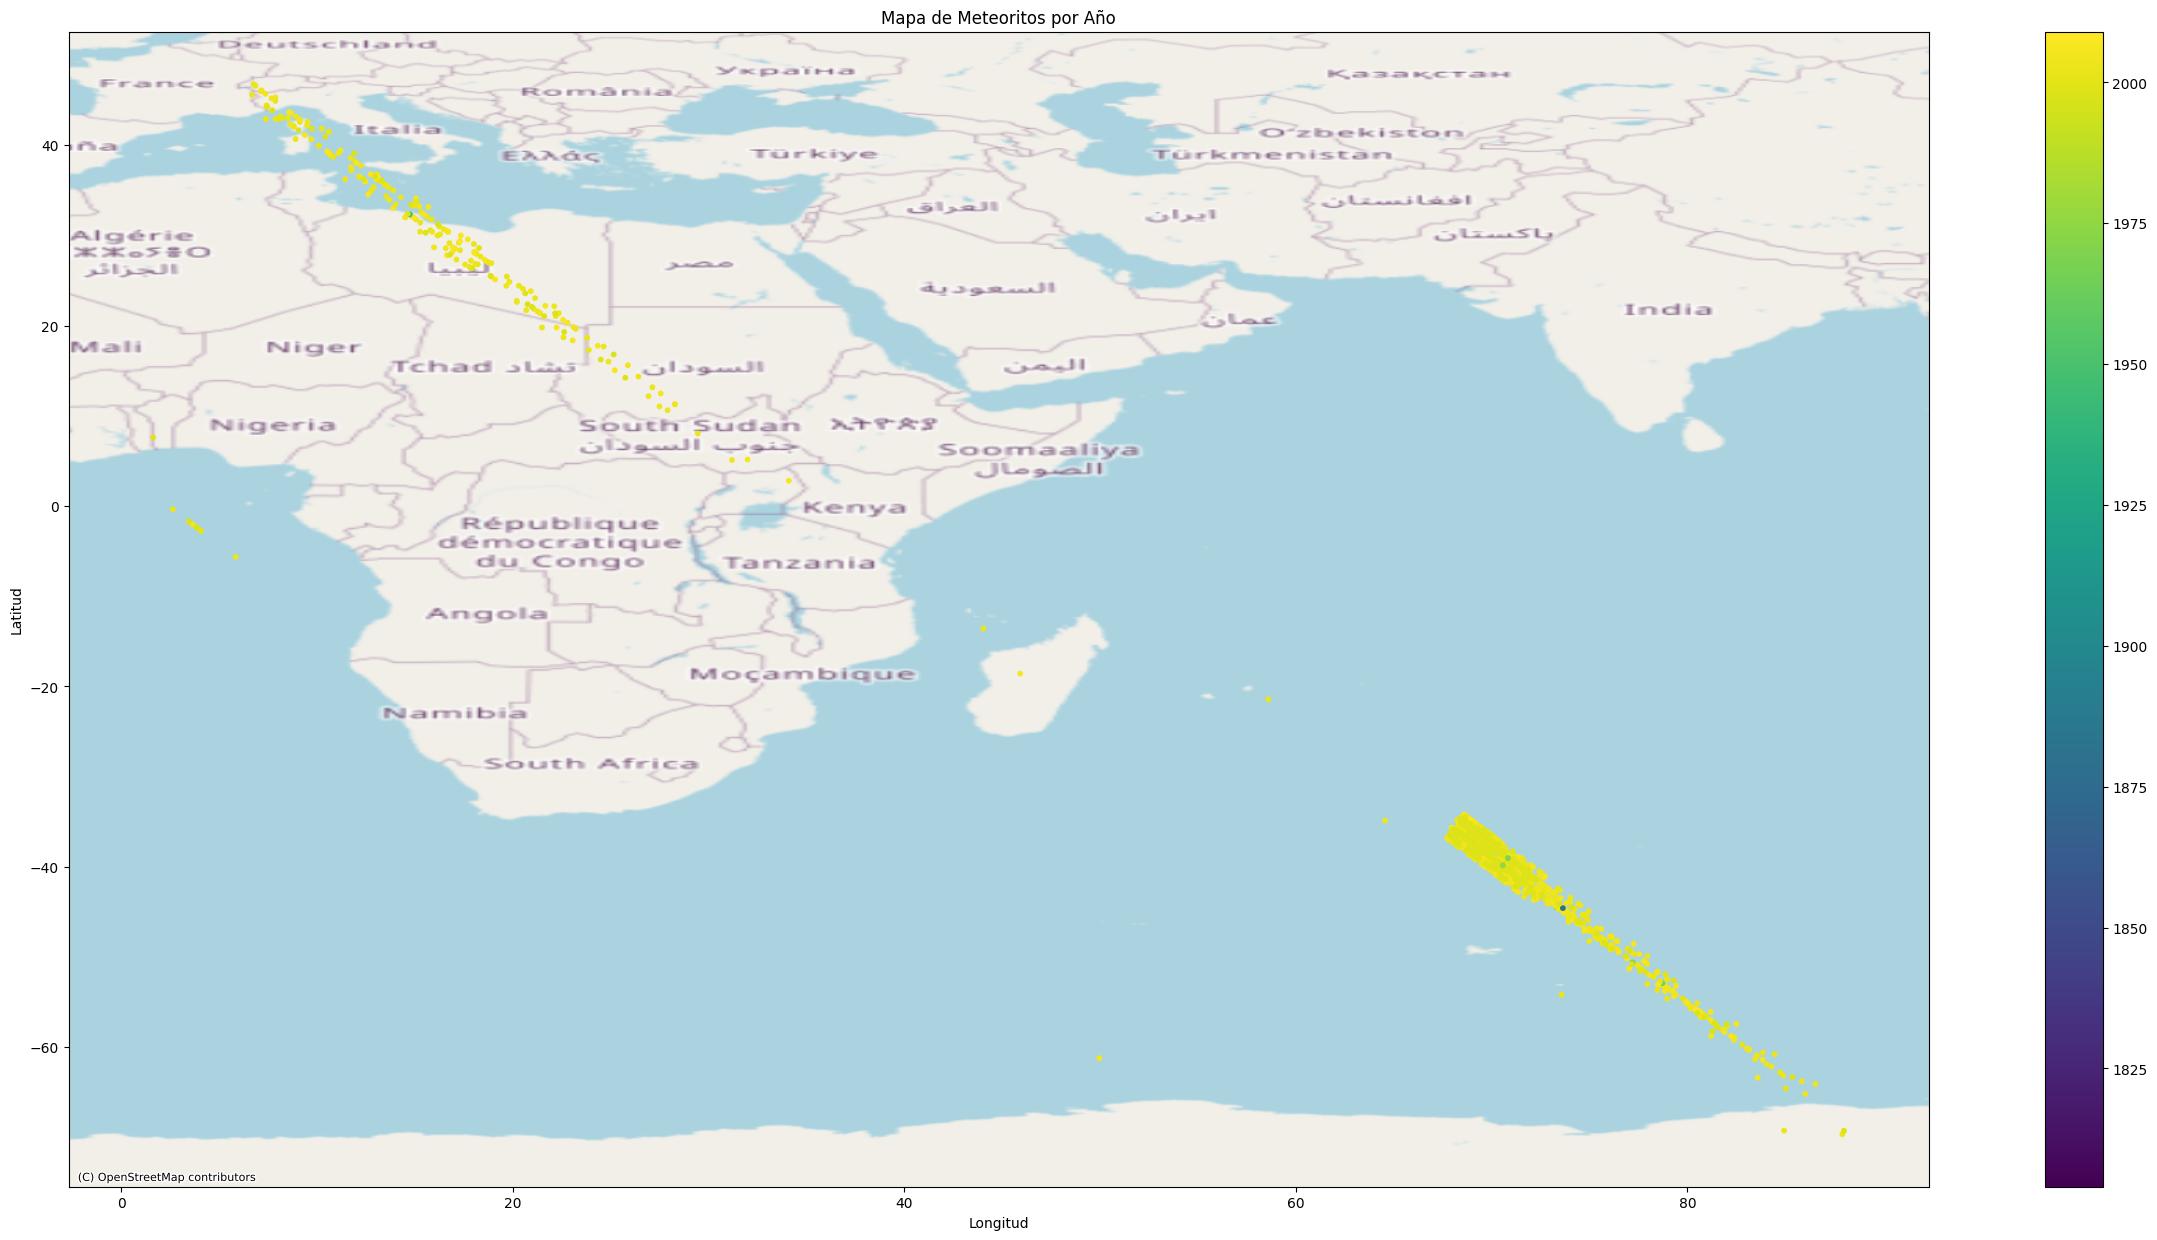

In [337]:
# Plot de los puntos de localización
ax = gdf3.plot(column='year', cmap='viridis', markersize=10, legend=True)

# Ajustar el tamaño de la figura
fig = ax.get_figure()
fig.set_size_inches(30, 15)

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf3.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar la relación de aspecto
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()